In [1]:
import numpy as np

In [5]:
X_b = np.c_[np.ones((100, 1)), X] # add X0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
theta_best

array([[3.85548818],
       [3.13166199]])

In [10]:
X_new = np.array([[0],  [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = t to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.85548818],
       [10.11881217]])

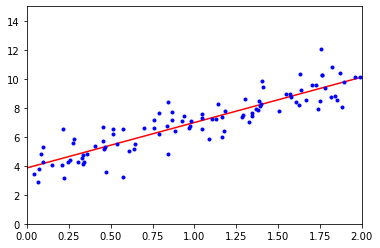

In [13]:
import matplotlib.pyplot as plt 
plt.plot(X_new,  y_predict,  "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [16]:
eta = 0.1 # learning rate
n_iterations = 1000
m =100

In [17]:
theta = np.random.randn(2,1) # random initialization

In [18]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [19]:
theta

array([[3.85548818],
       [3.13166199]])

In [20]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters


In [21]:
def learning_schedule(t):
 return t0 / (t + t1)


In [22]:
theta = np.random.randn(2,1) # random initialization

In [24]:
for epoch in range(n_epochs):
 for i in range(m):
     random_index = np.random.randint(m)
     xi = X_b[random_index:random_index+1]
     yi = y[random_index:random_index+1]
     gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
     eta = learning_schedule(epoch * m + i)
     theta = theta - eta * gradients

In [25]:
theta

array([[3.88082211],
       [3.14421503]])

In [54]:
 from sklearn.preprocessing import PolynomialFeatures


In [55]:
 poly_features = PolynomialFeatures(degree=2, include_bias=False)



In [56]:
 X_poly = poly_features.fit_transform(X)

In [57]:
X[0]

array([1.34336474])

In [58]:
X[4]

array([0.51263072])

In [59]:
X[10]

array([0.27711492])

In [60]:
 X_poly[0]

array([1.34336474, 1.80462883])

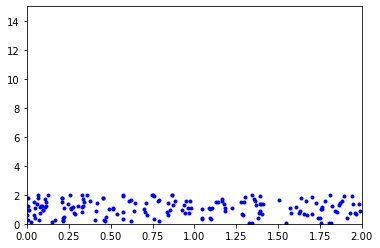

In [65]:
plt.plot(X_poly, x, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [1]:
from sklearn.metrics import mean_squared_error

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

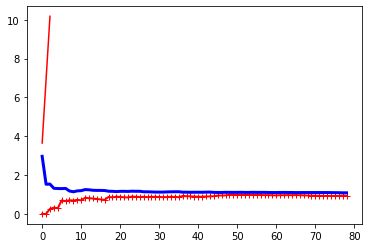

In [19]:
from sklearn.linear_model import LinearRegression
import numpy as np
from matplotlib import pyplot as plt


X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

X_new = np.array([[0], [2]])
y_predict = X_new_b.dot(theta_best)


plt.plot(X_new, y_predict, "r-")

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)


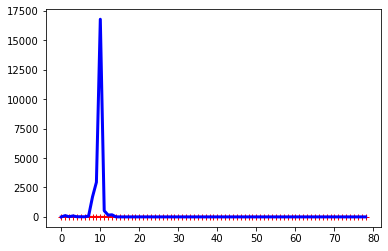

In [23]:
# 10th degree polynomial model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression = Pipeline((
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("sgd_reg", LinearRegression()),
    ))

plot_learning_curves(polynomial_regression, X, y)


In [4]:
# Ridge Regression
from sklearn.linear_model import Ridge
import numpy as np

In [6]:
ridge_reg = Ridge(alpha=1, solver="cholesky")
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
ridge_reg.fit(X, y)



Ridge(alpha=1, solver='cholesky')

In [7]:
ridge_reg.predict([[1.5]])


array([[8.54579139]])

In [9]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2")

In [10]:
sgd_reg.fit(X, y.ravel())

SGDRegressor()

In [11]:
sgd_reg.predict([[1.5]])


array([8.70175318])

In [12]:
# Lasso
from sklearn.linear_model import Lasso

In [13]:
lasso_reg = Lasso(alpha=0.1)


In [14]:
lasso_reg.fit(X, y)


Lasso(alpha=0.1)

In [15]:
lasso_reg.predict([[1.5]])

array([8.42777703])

In [16]:
# ElasticNet
from sklearn.linear_model import ElasticNet

In [17]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)


In [18]:
elastic_net.fit(X, y)


ElasticNet(alpha=0.1)

In [19]:
 elastic_net.predict([[1.5]])


array([8.30030942])

In [26]:
# early stopping
from sklearn.base import clone


In [28]:
sgd_reg = SGDRegressor(warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005)


In [29]:
minimum_val_error = float("inf")


In [30]:
best_epoch = None


In [31]:
best_model = None


In [33]:
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

NameError: name 'X_train_poly_scaled' is not defined